# Pràctica 1: Resolem un problema de classificacio

## Objectius

Els objectius d'aquesta pràctica són:

* Aplicar els coneixements adquirits sobre classificacio, tecniques d'emplenats de nans i validacio creuada.
  
* Ser capac de comparar diferents models classificacio

* Ser capac de fer busca d'hiperparametres.

* Entendre i implamentar la validacio creuada

* Analitzar detalladament els resultats obtinguts durant l'aprenentatge dels diferents models.

Aquesta practica es previa al cas kaggle que realitzareu durant la segona part de l'assignatura. En aquesta primera practica les preguntes estan definides, pero us ha de servir d'aprenentatge alhora de saber com estructurar un projecte d'aprenentatge automatic ja que en el cas kaggle no tindreu les preguntes.

## Bases de dades

En aquesta practica farem servir la base de dades del titanic. L'atribut que predirem es Survived, el qual ens diu si va sobreviure o no cada passatger.


https://www.kaggle.com/c/titanic/data


##Treball en grup
Aquesta practica es treballara en grups de 2-3 persones. En casos excepcionals i degudament justificats la practica es podra realitzar de forma individual.
## Seguiment i entrega de la pràctica

En la pràctica 1, es presenten diverses tasques per fer una correcta comparativa dels resultats obtinguts per diversos mètodes de classificació numèrica en una mateixa base de dades.


En aquesta practica es realitzara sessions de seguiment del treball. Aquestes sessions de treball està orientada a que els alumnes que vingueu pugueu preguntar i resoldre dubtes sobre les dades, preguntar sobre l'objectiu de cada apartat dels enunciats que no us hagi quedat clar, i preguntar sobre els resultats que esteu obtenint a l'hora d'analitzar les dades. Es molt recomanable venir amb el treball fet a clase per tal de poder comentar dubtes.

Pel que fa l'entrega, caldra entregar per caronte el seguent:

1. Memòria en format PDF o en la mateixa notebook explicant els resultats trobats sobre la bases de dades amb el respectiu codi de python. Aquesta nota es la mateixa per tots els membres del grup (9 pts)

2. Presentació amb els resultats 4 min màxim. Aquesta nota es individual. (1 pt)

Nota: En cas d'entregar la memoria com a PDF, caldra entregar el codi de python a part. Si s'entrega com a notebook, la mateixa notebook servira com a codi.



# Descripcio de la pràctica

A continuacio es mostren tots els continguts que s'evaluara en la pràctica:

1. EDA (exploratory data analysis) (1 punts):
  * Analisi de tamany i tipologia de dades ( 0.25 pt)
  * Primera valoracio de correlacions ( 0.5 pt)
  * Analisi atribut target ( 0.25 pt)
2. Preprocessing (2 punts):
  * Eliminacio de nans (0.5 punts)
  * Encoding de categoriques (0.75 punts)
  * Altres (PCA, normalitzacio..)
3. Metric selection (1.5 punts):
  * Seleccio de la millor metrica pel problema (0.75 punts)
  * Visualitzacio de ROC/AUC (0.75 punts)
4. Model Selection amb Crossvalidation (4 punts):
  * Seleccio del millor model (2 punts)
  * Busqueda hiperparametres (2 punts)
5. Analisi final (1.5 punt)

Cal dir que, les puntuacions dins de cada apartat son orientatives. La pràctica esta construida a partir d'un seguit de preguntes orientatives en cada apartat les quals tenen relacio amb els continguts evaluables. **NO cal contestar-les totes**. Són una guia per a que reflexioneu i aprengueu detalls de cada apartat.  Es recomanable, aixo si, llegir totes les preguntes abans de realitzar la practica i tenir-les en ment alhora d'executar-la.


**IMPORTANT**: El que es valorara en la practica es la capacitat de mantenir una narrativa coherent alhora que es realitzen els resultats. No es mirara tant que alguna pregunta quedi per respondre sino que els passos seguits en base als resultats obtinguts siguin coherents.

In [1]:
%pip install seaborn
%pip install scikit-learn

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer



data = pd.read_csv("train.csv")

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Usuario\Documents\Python310\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\Users\Usuario\Documents\Python310\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\usuario\documents\python310\lib\site-packages (1.5.2)



### 1. EDA (exploratory data analysis) (1 punt)

Abans de resm cal sempre veure com es la base de dades asignada?

**Preguntes:**
* Quants atributs té la vostra base de dades?

* Quin tipus d'atributs tens? (Númerics, temporals, categorics, binaris...)
* Com es el target, quantes categories diferents existeixen?
* Tenim nans en les dades?
* Podeu veure alguna correlació entre X i y?
* Estan balancejades les etiquetes (distribució similar entre categories)? Creus que pot afectar a la classificació la seva distribució?


In [2]:
#1.1 Atributs de la base de dades
at = data.shape[1]
print("Atributs de la BD : " , at)
print(data.columns)

Atributs de la BD :  12
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [3]:
#1.2 Tipus d'atributs
types=data.dtypes
print(types)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [4]:
#1.3 Com es el target + categories diferents
num_cat = data["Survived"].nunique() #nunique porque así podemos ver la cantidad de valores únicos que toma la variable targe(Survived)
valor=data["Survived"].unique()
print("Categories diferents :", num_cat,"\n",valor)


Categories diferents : 2 
 [0 1]


In [5]:
#1.4 NaNs?
are_nans= data.isna().sum() # los NaNs y nulls los toma igual 
print(are_nans)
#are_nans= data.isnull().sum()
#print(are_nans)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [6]:
#1.5 Correlació entre X i Y
data_corr = (data.select_dtypes(include=[np.number])).corr() #hacemos la matriz de correlación unicamente con valores numericos
print(data_corr)


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


# Visualización de la Matriz

Para Mostrar la correlación entre X e Y usaremos el mapa de calor que nos ofrece seaborn para poder mostralo de forma mucho más visual y comprensible sin la necesidad de ver los valores con precisión. Este mapa de calor tendrá dos colores base :
* Rojo --> Valores positivos --> Correlación positiva --> Las variables están relacionadas y por tanto si una se ve afectada por un evento, la otra también.
* Azul --> Valores negativos --> Correlación negativa --> Las variables no están relacionadas, por tanto una es independiente respecto la otra.

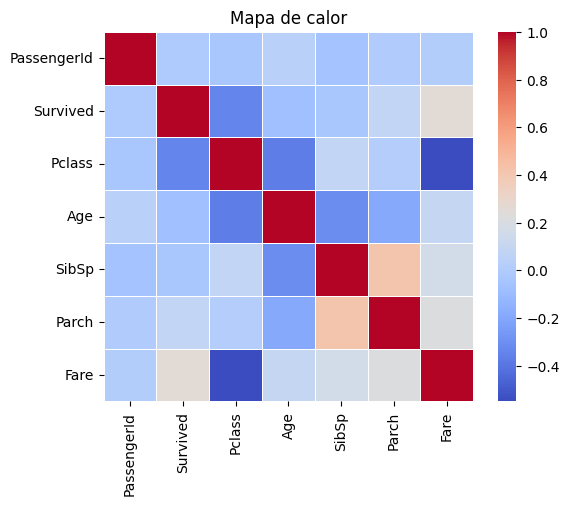

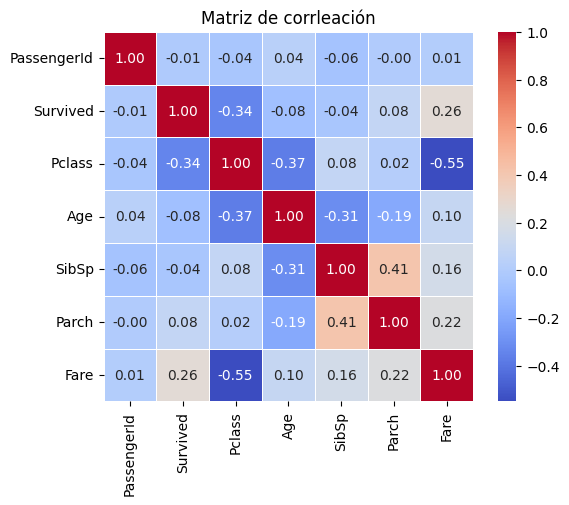

In [7]:
#mostrar la matriz de forma visual 
sns.heatmap(data_corr, annot=False, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Mapa de calor')
plt.show()

sns.heatmap(data_corr, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, square=True)
plt.title('Matriz de corrleación')
plt.show()

In [8]:
#1.6 Etiquetes balancejades + afecten 

n_etiquetes = data["Survived"].value_counts()
p_etiquetes =  data["Survived"].value_counts(normalize=True)*100
print("Distribució del target :")
print(n_etiquetes, p_etiquetes)


Distribució del target :
Survived
0    549
1    342
Name: count, dtype: int64 Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


### 2. Preprocessing (normalitzation, outlier removal, feature selection..) (2 punts)
Un cop vistes les dades de les que es disposa, cal preparar les dades per als nostres algoritmes. Segons la tipologia de dades, es poden filtrar atributs, aplicar-hi reductors de dimensionalitat, codificar categories textuals en valors numèrics, normalitzar les dades, treure outliers...

Navegueu per la [documentació de sklearn sobre preprocessing](https://scikit-learn.org/stable/modules/preprocessing.html) per tal de trobar les diferents opcions que proporciona sklearn.

**Preguntes:**
* Estàn les dades normalitzades? Caldria fer-ho?
* En cas que les normalitzeu, quin tipus de normalització será més adient per les vostres dades?
* Teniu gaires dades sense informació (nans)? Tingueu en compte que hi ha metodes que no els toleren durant el aprenentatge. Com afecta a la classificació si les filtrem? I si les reompliu? Com ho farieu? [Pista](https://scikit-learn.org/stable/modules/impute.html)
* Teniu dades categoriques? Quina seria la codificació amb més sentit?
* Podreu treure algun atribut extra de les categoriques (per exemple, aplicant alguna regla sobre el text)?
* Caldria aplicar PCA? Quins beneficis o inconvenients trobarieu?
* Caldria aplicar alguna tecnica de seleccio de features? Ho trobeu necessari?
* Es poden aplicar PolynomialFeatures per millorar la classificació? En quins models té sentit fer-ho?

In [9]:
#2.1 Dades noralitzades ? 
#seguim treballant amb el mateix df 
#normalitzades --> valors entre 0 i 1 
display(data)
#Sex lo pasamos a binario y Age, SibSp, Parch, Fare normalizaria

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
#Normalització amb MinMax
scaler = MinMaxScaler()

#data['Age'] = scaler.fit_transform(data[['Age']])
data['SibSp'] = scaler.fit_transform(data[['SibSp']])
data['Parch'] = scaler.fit_transform(data[['Parch']])
data['Fare'] = scaler.fit_transform(data[['Fare']])


#Generamos un recodificacion para Sex de forma que sea binario, asi normalizamos los valores
data['Sex'] = data['Sex'].map({'male': 1, 'female': 0})

display(data)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,0.125,0.000000,A/5 21171,0.014151,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,0.125,0.000000,PC 17599,0.139136,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0.000,0.000000,STON/O2. 3101282,0.015469,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,0.125,0.000000,113803,0.103644,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0.000,0.000000,373450,0.015713,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0.000,0.000000,211536,0.025374,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0.000,0.000000,112053,0.058556,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,0.125,0.333333,W./C. 6607,0.045771,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0.000,0.000000,111369,0.058556,C148,C


In [11]:
#Eliminació de columna per Cabin, Name i Ticket
data = data.drop(columns=['Cabin'])
data = data.drop(columns=['Name'])
data = data.drop(columns=['Ticket'])
display(data)

#Eliminació de fila per Embarked
rows_with_nan = data[data['Embarked'].isnull()]
display(rows_with_nan) #61 i 829
data = data.drop(index=[61,829])


#Imputació de l'atribut Age
imputer = SimpleImputer(strategy='mean')
data['Age'] = imputer.fit_transform(data[['Age']])
display(data)






,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,0.125,0.000000,0.014151,S
1,2,1,1,0,38.0,0.125,0.000000,0.139136,C
2,3,1,3,0,26.0,0.000,0.000000,0.015469,S
3,4,1,1,0,35.0,0.125,0.000000,0.103644,S
4,5,0,3,1,35.0,0.000,0.000000,0.015713,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0.000,0.000000,0.025374,S
887,888,1,1,0,19.0,0.000,0.000000,0.058556,S
888,889,0,3,0,NaN,0.125,0.333333,0.045771,S
889,890,1,1,1,26.0,0.000,0.000000,0.058556,C


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,0,38.0,0.0,0.0,0.15615,NaN
829,830,1,1,0,62.0,0.0,0.0,0.15615,NaN


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,0.125,0.000000,0.014151,S
1,2,1,1,0,38.000000,0.125,0.000000,0.139136,C
2,3,1,3,0,26.000000,0.000,0.000000,0.015469,S
3,4,1,1,0,35.000000,0.125,0.000000,0.103644,S
4,5,0,3,1,35.000000,0.000,0.000000,0.015713,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0.000,0.000000,0.025374,S
887,888,1,1,0,19.000000,0.000,0.000000,0.058556,S
888,889,0,3,0,29.642093,0.125,0.333333,0.045771,S
889,890,1,1,1,26.000000,0.000,0.000000,0.058556,C


In [12]:
#Tenim Sex,  Embarked, Ticket, Name, Cabin i PClass com atributs categorics
#Sex ja l'hem normalitzat pasant-ho a binari i Cabin l'hem eliminat
#Name no te sentir canviar-ho i Ticket tampoc ja que es un identificador, i com no 
#donen informació útil l'hem descartat.

#Així que tractarem a PClass i Embarked amb One-Hot Encoding
data = pd.get_dummies(data, columns=['Pclass', 'Embarked'], drop_first=False)

#Canviem el format bolea a format int ja que get_dummies m'ha retornat True o False
for col in data.select_dtypes(include=['bool']).columns:
    data[col] = data[col].astype(int)

display(data)




,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,1,22.000000,0.125,0.000000,0.014151,0,0,1,0,0,1
1,2,1,0,38.000000,0.125,0.000000,0.139136,1,0,0,1,0,0
2,3,1,0,26.000000,0.000,0.000000,0.015469,0,0,1,0,0,1
3,4,1,0,35.000000,0.125,0.000000,0.103644,1,0,0,0,0,1
4,5,0,1,35.000000,0.000,0.000000,0.015713,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,27.000000,0.000,0.000000,0.025374,0,1,0,0,0,1
887,888,1,0,19.000000,0.000,0.000000,0.058556,1,0,0,0,0,1
888,889,0,0,29.642093,0.125,0.333333,0.045771,0,0,1,0,0,1
889,890,1,1,26.000000,0.000,0.000000,0.058556,1,0,0,1,0,0


In [13]:
#Analitzant les dades que tenim realment no treuriem gran cosa afegint Atributs extres a partir d'atributs ja
#existents en general com podria ser el Miss del nom, que indica si està casat o el seu sexe (ja que ja tenim 
# atributs que indiquen això mateix). En canvi si que veiem oportú afegir l'atribut Kid ja que son els que
#pujaven als bots abans.

#Per fer això comentarem la linea que normalitza les dades de Age i després de crear el nou atribut les 
# normalitzarem


rows_with_kid = data[data['Age']<12]
display(rows_with_kid)
data['Age'] = scaler.fit_transform(data[['Age']])
display(data)


,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
7,8,0,1,2.00,0.375,0.166667,0.041136,0,0,1,0,0,1
10,11,1,0,4.00,0.125,0.166667,0.032596,0,0,1,0,0,1
16,17,0,1,2.00,0.500,0.166667,0.056848,0,0,1,0,1,0
24,25,0,0,8.00,0.375,0.166667,0.041136,0,0,1,0,0,1
43,44,1,0,3.00,0.125,0.333333,0.081157,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
827,828,1,1,1.00,0.000,0.333333,0.072227,0,1,0,1,0,0
831,832,1,1,0.83,0.125,0.166667,0.036598,0,1,0,0,0,1
850,851,0,1,4.00,0.500,0.333333,0.061045,0,0,1,0,0,1
852,853,0,0,9.00,0.125,0.166667,0.029758,0,0,1,1,0,0


,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,1,0.271174,0.125,0.000000,0.014151,0,0,1,0,0,1
1,2,1,0,0.472229,0.125,0.000000,0.139136,1,0,0,1,0,0
2,3,1,0,0.321438,0.000,0.000000,0.015469,0,0,1,0,0,1
3,4,1,0,0.434531,0.125,0.000000,0.103644,1,0,0,0,0,1
4,5,0,1,0.434531,0.000,0.000000,0.015713,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,1,0.334004,0.000,0.000000,0.025374,0,1,0,0,0,1
887,888,1,0,0.233476,0.000,0.000000,0.058556,1,0,0,0,0,1
888,889,0,0,0.367204,0.125,0.333333,0.045771,0,0,1,0,0,1
889,890,1,1,0.321438,0.000,0.000000,0.058556,1,0,0,1,0,0


### 3. Metric selection (1.5 punts)
En aquest apartat ens centrarem en les mètriques de classificació ([documentació](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics)). Per a fer-ho, entreneu una regressio logistica (no cal separar train-test) i a partir d'aquesta generarem una serie de funcions per analitzar els nostres resultats . Aquestes funcions ens serviran mes endevant. Caldra tambe triar la metrica que farem servir despres per triar el millor model.

**Preguntes:**
* A teoria, hem vist el resultat d'aplicar el `accuracy_score` sobre dades no balancejades. Podrieu explicar i justificar quina de les següents mètriques será la més adient pel vostre problema? `accuracy_score`, `f1_score` o `average_precision_score`?

Abans de tot definim que informació donen aquestes métriques:

**accuracy_score**: Ens dona la proporció de prediccions correctes respecte al total de prediccions fetes. 

**f1_score**: Es basa en la mitjana de la precisió i el recall la `precisió` és com de bé evita el model els falsos positius. És a dir que quan diu que allò és positiu no s'equivoca. Això no té en compte quants ha predit malament només si els que han posat en un lloc estan bé o no. El `recall` ens serveix per mesurar com de bé evita el model els falsos negatius, És a dir, un alt recall vol dir que detecta bé la majoria de les mostres que haurien de ser positives


**average_precision_score**: Mesura la precisió del model (quants dels exemples que ha classificat com a "positius" són realment positius) en diferents nivells de recall (quants dels positius reals el model ha detectat correctament).

En base a aquestes definicions, si tenim dades desbalancejades, el accuracy no seria una bona idea ja que no reflecteix bé el rendiment del futur model en les classes minoritàries, podem agafar f1 o el average precision però per als nostres objectius, utilitzarem la f1 ja que ens interessa un cert equilibri entre precisió i recall.



* Abans de comencar a entrenar models, genereu una suite de funcions per poder analitzar graficament com esta anant el vostre model. Mostreu la Precisió-Recall Curve i la ROC Curve. Quina és més rellevant pel vostre dataset? Expliqueu amb les vostres paraules, la diferencia entre una i altre [Pista](https://stats.stackexchange.com/questions/338826/auprc-vs-auc-roc)


La corba ROC ens mesura la tasa de vertaders positius vers la tasa de falsos positius. Al centrar-se només en la part dels etiquetatges positius, si el dataset es troba desbalancejat, la corba ens pot donar la sensació de que el model és millor del que realment es.

D'altra banda la corba Precisió-Recall mesura la relació entre la taxa de vertaders positius y la taxa de falsos positius, és a dir, ens mostra com el model controla la detecció de vertaders positius sense deixar-se anar per la gran quantitat de casos negatius que poden haver-hi (o viceversa).

Es conclusió, per a nosaltres és més rellevant el resultat que ens doni la corba de precisió-recall.




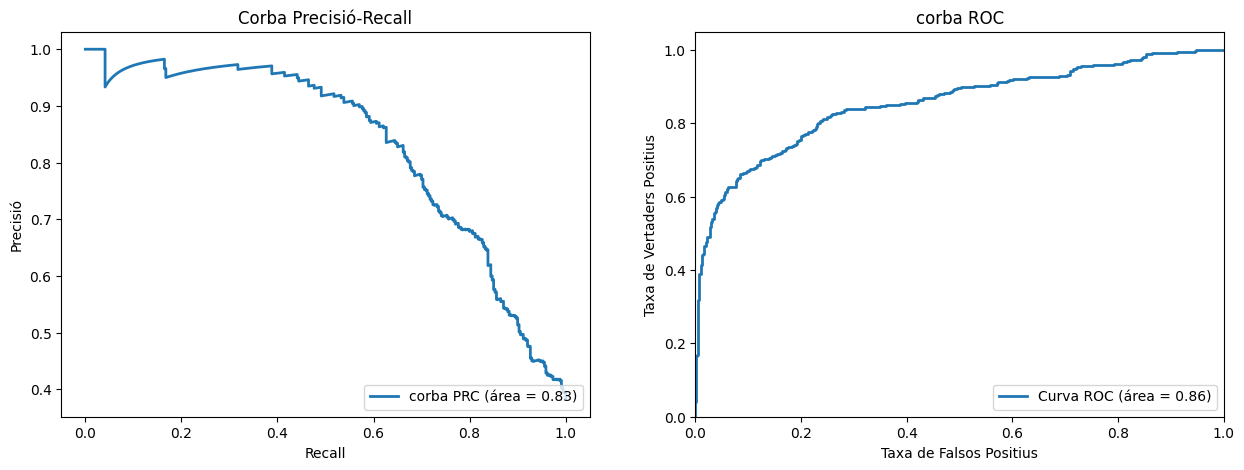

In [14]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, roc_curve, auc, classification_report
target = 'Survived' #el resultat
attributes = [k for k in data.keys() if k!=target] # separem la llista d'atributs del resultat

X = data[attributes].to_numpy() #passem el dataframe a un array de arrays
y = data[target].to_numpy() #la 'y' sempre es allo que el model ens ha de trobar (el resultat)

lr = LogisticRegression(max_iter=1000) #aumentem el numero de iteracions ja que si no el model no troba una solució optima a causa del desbalancejament
lr.fit(X, y) #entrenem el model


# cada array dintre seria la probabilitat de que estigui en una classe o en l'altra per a cada mostra,
# pero amb [:, 1] agafem la probabilitat de que estigui a la classe que li pertoca realment  
probs = lr.predict_proba(X)[:, 1]


#   OBS: el UMBRAL seria que cada vegada que s'etiqueten totes les mostres es fa amb una 'tolerancia' diferent ,
#   (ex: si establim que la persona sobreviu quan la probabilitat que ens dona el model es de 0,85 o mes,
#   i despres probem altra vegada per ab altra umbral com per exemple 0,5 i així --> anme genrant precision i recalls per cada iteració de umbrals

# CALCUL DE LA CORBA PRECISIÓ RECALL
# precision --> array amb totes les precisions claculades (una per cada umbral que s'ha probat) 
# recalls --> array de tots els recalls amb diferents 
# _ --> son els umbrals utilitzats que no necessitem
precision, recall, _ = precision_recall_curve(y, probs) #utilitzem les etiqutes originals (y) i les que ha calculat el model (probs)


# CALUCL DE LA CORBA ROC
# fpr --> array de taxes de fals positve rate per als diferents umbrals
# tpr --> array de taxes de true positve rate per als diferents umbrals
# _ ---> array de umbrals que ignorem
fpr, tpr, _ = roc_curve(y, probs)

#CALCUL DEL AUC (area under the curve)
# si fos 0.5 podriem dir que el model no es millor que endevinar al atzar (equivalent a llençar una moneda).
# si fos 1.0 el model seria perfecte --> possible overfitting?
auc_prc = auc(recall, precision) 
roc_auc = auc(fpr, tpr) 



plt.figure(figsize=(15, 5)) 

# corba Precisió-Recall
plt.subplot(1, 2, 1)  # posició de la grafica --> cuadricula de 1a fila i 2 columnes --> index 1 
plt.plot(recall, precision, lw=2, label='corba PRC (área = %0.2f)' % auc_prc)
plt.xlabel('Recall')
plt.ylabel('Precisió')
plt.title('Corba Precisió-Recall')
plt.legend(loc="lower right")

# corba ROC
plt.subplot(1, 2, 2)  # posició de la grafica --> cuadricula de 1a fila i 2 columnes --> index 2
plt.plot(fpr, tpr, lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positius')
plt.ylabel('Taxa de Vertaders Positius')
plt.title('corba ROC')
plt.legend(loc="lower right")


plt.subplots_adjust(wspace=0.2) # separem una mica les grafiques que estan massa juntes 
plt.show()

* Què mostra [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html)? Quina métrica us fixareu per tal de optimitzar-ne la classificació pel vostre cas?

Nota: Fixeu-vos que en aquest apartat NO ES VALOREN ELS RESULTATS. L'unic que es valora es l'eleccio de la metrica de classificacio aixi com saber quin tipus de grafiques fer per analitzar els resultats. Abans de solucionar un problema cal tenir molt clar la metrica d'error que es fara servir, i es una decisio que cal pendre previa a entrenar models


La classification report ens mostra una taula amb metriques com  la precisió, el recall, la f1-score i el support.
la unica que encara no hem tractat es la metrica support que ens indica el total de etiquetes que tenim de cada cas dintre del nostre conjunt (en aquest cas, el conjunt de entrenament).

Com ja hem dit abans, la metrica en la que mes ens fixarem es la f1-score ja que com hem dit, ens interesa un cert equlibri entre precissió i recall devant de un conjunt de dades desbalcejades.


In [15]:

#fem que el model predigui les etiquetes (y_train_pred) usant les mateixes dades d'entrenament amb les que va ser entrenat.
y_train_pred = lr.predict(X)
report = classification_report(y, y_train_pred)

print(report) #observem que cap de les metriques ens dna un 100% o una cosa semblant així es probable que no tindrem overfitting

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       340

    accuracy                           0.80       889
   macro avg       0.79      0.78      0.79       889
weighted avg       0.80      0.80      0.80       889



### 4. Model Selection amb validacio creuada (4 punts)

Fent servir la metrica trobada en l'apartat anterior, en aquest apartat caldra seleccionar una serie de models i, fent us de la validacio creuada, seleccionar el millor model amb els seus respectius millors hyperparametres que haurem buscat fent hyperparameter search.

La tasca d'aquesta pràctica s'enmarca dins l'aprenentatge computacional **supervisat**. A sklearn, disposem de varies tècniques [(veure documentació)](https://scikit-learn.org/stable/supervised_learning.html). A les classes de teoria, hem vist varies tècniques, com ara logistic regression, SVM amb diferents kernels, Nearest Neighbour... i tambe coneixeu altres tecniques d'altres cursos, com els arbres de decisio. Ademes, en la classe de problemes hem donat tambe els random forest i els gradient boosting. Per aquest apartat es demana seleccionar **un minim de 4 models** (per exemple, regressio logistica, random forest, KNN, SVM).

**Preguntes:**
* Quins models heu considerat? Perque els heu seleccionat?
* Fent servir validacio creuada, escolliu el millor model (agafant els hiperparamtres per defecte). Recordeu fer servir la metrica utilitzada en l'apartat anterior. Perque es important fer servir validacio creuada? Heu de fer servir algun [tipus de validacio creuada](https://scikit-learn.org/stable/modules/cross_validation.html) en especial?


In [29]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": make_pipeline(StandardScaler(), KNeighborsClassifier()),
    "Support Vector Machine": make_pipeline(StandardScaler(), SVC())
}

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

model_scores = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X, y, scoring='f1', cv=cv)
    model_scores[model_name] = scores.mean()  

for model_name, score in model_scores.items():
    print(f"{model_name}: F1-Score mitjà = {score:.4f}")

# Identificación del mejor modelo
best_model_name = max(model_scores, key=model_scores.get)
print(f"\nEl millor model és: {best_model_name} amb F1-Score mitjà = {model_scores[best_model_name]:.4f}")


c:\Users\Usuario\Documents\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Usuario\Documents\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Logistic Regression: F1-Score mitjà = 0.7260
Random Forest: F1-Score mitjà = 0.7494
K-Nearest Neighbors: F1-Score mitjà = 0.7135
Support Vector Machine: F1-Score mitjà = 0.7223

El millor model és: Random Forest amb F1-Score mitjà = 0.7494


* Seleccioneu una serie d'hyperparametres a provar per cadascun dels models i realitzeu una cerca d'hyperparametres. Hi ha algun model que creieu que podeu descartar de primeres? Perque?

* Mostreu els resultats en una taula on es mostri el model, els experiments realitzats i els resultats obtinguts (tant en train com en test). Podeu mostrar tambe el temps d'entrenament de cada model.

* Quin tipus de K-fold heu escollit en la seleccio de models? I en la seleccio de models amb hyperparametres? Com afecta al resultat modificar el numero de k (numero de folds) al resultat?

* Quines formes de buscar el millor parametre heu trobat? Són costoses computacionalment parlant? [documentació](https://scikit-learn.org/stable/modules/grid_search.html) Quina heu seleccionat?

* Si disposem de recursos limitats (per exemple, un PC durant 1 hora) quin dels métodes creieu que obtindrà millor resultat final?

* Existeixen altres mètodes de búsqueda més eficients ([scikit-optimize](https://scikit-optimize.github.io/stable/))?

* Opcional : Feu la prova, i amb el model i el metode de crossvalidació escollit, configureu els diferents metodes de búsqueda per a que s'executin durant el mateix temps (i.e. depenent del problema, 0,5h-1 hora). Analitzeu quin ha arribat a una millor solució. (Ajuda: estimeu el temps que trigarà a fer 1 training el vostre model, i aixi trobeu el número de intents que podeu fer en cada cas.)

In [56]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import time  
from sklearn.metrics import f1_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

warnings.filterwarnings("ignore")


models = {
    "Regresión Logística": {
        "model": LogisticRegression(),
        "params": {
            'penalty': ['l1', 'l2', 'none'],
            'C': [0.01, 0.1, 1, 10],
            'solver': ['liblinear', 'saga'],
            'class_weight': [None, 'balanced']  
        }
    },
    "Bosque Aleatorio": {
        "model": RandomForestClassifier(),
        "params": {
            'n_estimators': [100, 150, 200],
            'max_depth': [8, 9, 10],
            'class_weight': [None, 'balanced'],
            'max_features': ['auto', 'sqrt', 'log2']
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            'n_neighbors': [1, 2, 3, 4],
            'weights': ['uniform', 'distance'],
            'p': [0,1,2,3,4]  
        }
    },
    "SVM": {
        "model": SVC(),
        "params": {
            'C': [1, 4, 5, 6, 10],
            'tol': [1.1, 1.01, 1, 0.1, 0.01],
            'class_weight': [None, 'balanced'],
        }
    }
}

results = []

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

for model_name, model_info in models.items():
    start_time = time.time()  

    grid_search = GridSearchCV(
        estimator=model_info["model"],
        param_grid=model_info["params"],
        cv=kfold,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )
    
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_

    y_pred_test = best_model.predict(X_test)
    f1_test = f1_score(y_test, y_pred_test)

    # Calcular temps
    elapsed_time = time.time() - start_time
    
    results.append([
        model_name,
        grid_search.best_score_,
        f1_test,
        best_model.get_params(),
        elapsed_time 
    ])

warnings.filterwarnings("default")

results_df = pd.DataFrame(results, columns=['Modelo', 'F1-Score (Train)', 'F1-Score (Test)', 'Hiperparámetros', 'Tiempo de Ejecución (s)'])

pd.set_option('display.max_colwidth', None)

results_df['Hiperparámetros'] = results_df['Hiperparámetros'].apply(lambda x: ', '.join([f"'{k}': {v}" for k, v in x.items()]))

print(results_df.to_string(index=False))


Fitting 10 folds for each of 48 candidates, totalling 480 fits
Fitting 10 folds for each of 54 candidates, totalling 540 fits
Fitting 10 folds for each of 40 candidates, totalling 400 fits
Fitting 10 folds for each of 50 candidates, totalling 500 fits
             Modelo  F1-Score (Train)  F1-Score (Test)                                                                                                                                                                                                                                                                                                                                                                                                            Hiperparámetros  Tiempo de Ejecución (s)
Regresión Logística          0.719358         0.742857                                                                                                                                  'C': 10, 'class_weight': balanced, 'dual': False, 'fit_intercept': True, 

In [47]:
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import time  
from sklearn.metrics import f1_score
from scipy.stats import uniform, randint

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

warnings.filterwarnings("ignore")

models = {
    "Regresión Logística": {
        "model": LogisticRegression(),
        "params": {
            'penalty': ['l1', 'l2', 'none'],
            'C': uniform(0.01, 10),
            'solver': ['liblinear', 'saga'],
            'class_weight': [None, 'balanced']  
        }
    },
    "Bosque Aleatorio": {
        "model": RandomForestClassifier(),
        "params": {
            'n_estimators': randint(100, 200),
            'max_depth': randint(8, 12),
            'class_weight': [None, 'balanced'],
            'max_features': ['auto', 'sqrt', 'log2']
        }
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {
            'n_neighbors': randint(1, 20),
            'weights': ['uniform', 'distance'],
            'p': randint(1, 4)
        }
    },
    "SVM": {
        "model": SVC(),
        "params": {
            'C': uniform(0.1, 10),
            'tol': [1.1, 1.01, 1, 0.1, 0.01],
            'class_weight': [None, 'balanced'],
        }
    }
}

results = []

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


for model_name, model_info in models.items():
    start_time = time.time()  

    randomized_search = RandomizedSearchCV(
        estimator=model_info["model"],
        param_distributions=model_info["params"],
        n_iter=20,
        cv=kfold,
        scoring='f1',
        n_jobs=-1,
        verbose=1,
        random_state=42
    )
    
    randomized_search.fit(X_train, y_train)
    
    best_model = randomized_search.best_estimator_

    y_pred_test = best_model.predict(X_test)
    f1_test = f1_score(y_test, y_pred_test)

    elapsed_time = time.time() - start_time
    
    results.append([ 
        model_name,
        randomized_search.best_score_,
        f1_test,
        best_model.get_params(),
        elapsed_time 
    ])

warnings.filterwarnings("default")

results_df = pd.DataFrame(results, columns=['Modelo', 'F1-Score (Train)', 'F1-Score (Test)', 'Hiperparámetros', 'Tiempo de Ejecución (s)'])

pd.set_option('display.max_colwidth', None)

results_df['Hiperparámetros'] = results_df['Hiperparámetros'].apply(lambda x: ', '.join([f"'{k}': {v}" for k, v in x.items()]))

print(results_df.to_string(index=False))


Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Fitting 10 folds for each of 20 candidates, totalling 200 fits
             Modelo  F1-Score (Train)  F1-Score (Test)                                                                                                                                                                                                                                                                                                                                                                                                            Hiperparámetros  Tiempo de Ejecución (s)
Regresión Logística          0.718148         0.742857                                                                                                                   'C': 5.152344384136116, 'class_weight': balanced, 'dual': False, 'fit_intercept': True, 

### 5.Analisi Final (1.5 punt)

Un cop seleccionat el millor model amb els millors hiperparamtres, caldra fer un report final amb els resultats obtinguts.

Preguntes:
* Mostreu les curves ROC/PR (la que hageu escollit en l'apartat 2) i interpreteu els resultats.

* Analitzeu en detall les diferents metriques que trobeu adients i comenteu per sobre com podrieu fer servir aquest model en un futur. Aixo es el que es coneix com un cas d'us.

* Com creieu que es podria millorar el vostre model?